<a href="https://colab.research.google.com/github/tungnt28/networkx_/blob/main/Bipartite_NguyenThanhTung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx

In [2]:
#Import package
import random
import networkx as nx
import matplotlib
import numpy as np
import pandas as pd

from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
from matplotlib import pyplot as plt
#To create an empty undirected graph
G = nx.Graph()

In [3]:
#Centralize node in graph
dcs = nx.degree_centrality(G)
for n in G.nodes():
    G.node[n]['centrality'] = dcs[n]

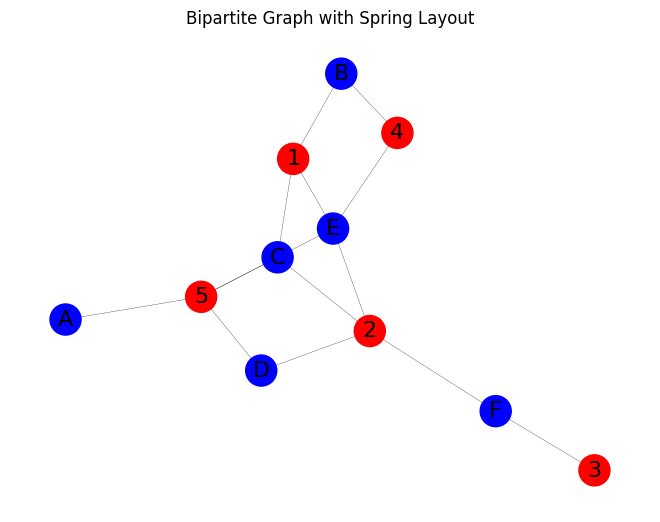

In [4]:
nodes_A = ['A', 'B', 'C', 'D', 'E', 'F']
nodes_B = [1, 2, 3, 4, 5]
# To add a node A
G.add_nodes_from([1, 2, 3, 4, 5], bipartite=0, node_color = 'blue')

# To add a node B
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'], bipartite=1, node_color = 'r')

for a in nodes_A:
  for b in nodes_B:
    if random.random() > 0.5:
      G.add_edge(a, b)

nx.spring_layout
nx.draw(G, with_labels=True, width=0.2, node_size=500, node_color= ['b' if node in nodes_A else 'r' for node in G.nodes()], font_size=16)
plt.title('Bipartite Graph with Spring Layout')
plt.show()

In [5]:
#Count số nodes và edges
nodes_A_count = len(nodes_A)
nodes_B_count = len(nodes_B)
edges_A_count = sum(1 for edge in G.edges() if edge[0] in nodes_A or edge[1] in nodes_A)
edges_B_count = sum(1 for edge in G.edges() if edge[0] in nodes_B or edge[1] in nodes_B)

nodes_A_count, edges_A_count, nodes_B_count, edges_B_count

(6, 14, 5, 14)

In [6]:
#Tính toán và hiển thị ma trận kề của đồ thị bipartite.
from networkx.algorithms import bipartite
biadj_matrix = bipartite.biadjacency_matrix(G, row_order=nodes_A, column_order=nodes_B)

biadj_matrix_display = biadj_matrix.toarray()
biadj_matrix_display

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [0, 1, 1, 0, 0]])

In [7]:
# Tìm và hiển thị danh sách các nút lá (nút không có cạnh nối với nút khác) trong tập đỉnh A và B.
def find_leaf_nodes(graph, node_set):
    return [node for node in node_set if graph.degree(node) == 1]

leaf_nodes_A = find_leaf_nodes(G, nodes_A)
leaf_nodes_B = find_leaf_nodes(G, nodes_B)
leaf_nodes_A, leaf_nodes_B

(['A'], [3])

In [8]:
# Tính toán và hiển thị bậc của mỗi nút trong tập đỉnh A và B.
degrees_A_nx = {node: G.degree(node) for node in nodes_A}
degrees_B_nx = {node: G.degree(node) for node in nodes_B}
degrees_A_nx, degrees_B_nx

({'A': 1, 'B': 2, 'C': 3, 'D': 2, 'E': 4, 'F': 2},
 {1: 3, 2: 4, 3: 1, 4: 2, 5: 4})